<a href="https://colab.research.google.com/github/BuiChiCuongs/BAOCAO_AI/blob/main/AI_Kind_of_Finger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [35]:
folder = '/content/drive/MyDrive/Colab Notebooks/Fingerprint_/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Blacksmith'):
    output = 1.0
  if file.startswith('Teacher'):
    output = 2.0
  if file.startswith('Engineer'):
    output = 3.0
  if file.startswith('Worker'):
    output = 4.0
  if file.startswith('Doctor'):
    output = 5.0
  if file.startswith('Clerk'):
    output = 6.0
  if file.startswith('Farmer'):
    output = 7.0
  if file.startswith('Electrician'):
    output = 8.0
  if file.startswith('Cashier'):
    output = 9.0
  if file.startswith('Baker'):
    output = 10.0
  photo = load_img(folder+file, target_size = (50,50))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)


In [36]:
# Convert list photos, labels to Numpy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(1000, 50, 50, 3) (1000,)


In [37]:
# Save data after preprocessing data
save('/content/drive/MyDrive/Colab Notebooks/Model/Fingerprint_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Model/Fingerprint_labels.npy', labels)

In [38]:
# Read data
photos = np.load('/content/drive/MyDrive/Colab Notebooks/Model/Fingerprint_photos.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/Model/Fingerprint_labels.npy')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape
y_train = to_categorical(y_train, num_classes=11)

In [49]:
y_train.shape

(800, 11)

In [47]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [42]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [43]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1,1), padding = 'same', activation = 'linear', input_shape=(50, 50, 3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(11, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [61]:
# Train model
train = model.fit(X_train, y_train, batch_size = 60, epochs = 10, verbose = 1)

Epoch 1/10
14/14 [==============================] - 5s 351ms/step - loss: 1.5313 - accuracy: 0.4800
Epoch 2/10
14/14 [==============================] - 7s 495ms/step - loss: 1.3865 - accuracy: 0.5263
Epoch 3/10
14/14 [==============================] - 5s 342ms/step - loss: 1.2306 - accuracy: 0.6112
Epoch 4/10
14/14 [==============================] - 6s 469ms/step - loss: 1.0699 - accuracy: 0.6637
Epoch 5/10
14/14 [==============================] - 6s 383ms/step - loss: 0.9426 - accuracy: 0.6938
Epoch 6/10
14/14 [==============================] - 5s 345ms/step - loss: 0.7493 - accuracy: 0.7788
Epoch 7/10
14/14 [==============================] - 7s 519ms/step - loss: 0.6815 - accuracy: 0.7713
Epoch 8/10
14/14 [==============================] - 5s 344ms/step - loss: 0.6123 - accuracy: 0.8112
Epoch 9/10
14/14 [==============================] - 11s 786ms/step - loss: 0.4025 - accuracy: 0.9075
Epoch 10/10
14/14 [==============================] - 9s 637ms/step - loss: 0.2421 - accuracy: 0.948

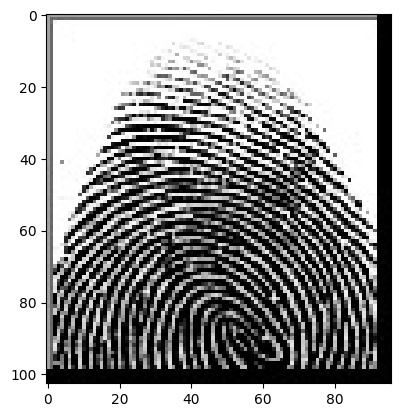

1/1 [==============================] - 0s 45ms/step
You will become a:  Baker


In [60]:
# Mở ảnh
img = Image.open('/content/Baker (77).jpg')
# Resize ảnh về kích thước mong muốn
IMG = img
img = img.resize((50, 50))
# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,50,50,3)
img = img.astype('float32') / 255.0
plt.imshow(IMG)
plt.show()
class_names = ["None","Blacksmith","Teacher","Engineer","Worker","Doctor", 
               "Clerk","Farmer","Electrician","Cashier","Baker",]
matrix = np.argmax(model.predict(img), axis=-1)
temp1 = matrix[0]
print("You will become a: ", class_names[temp1])